In [39]:
#importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#cargamos el dataset jamboree
ruta = r'C:/Users/matia/OneDrive/Escritorio/Curso_The_Corner/jamboree/jamboree_dataset.csv'
df = pd.read_csv(ruta) 
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
#cambiamos el nombre de las columnas
df = df.rename(columns={'Serial No.':'SERIALNUMBER', 'GRE Score':'GRE', 'TOEFL Score':'TOEFL', 'University Rating': 'UNIVERSITYRATING', 'Research':'RESEARCH', 'Chance of Admit ':'CHANCEOFADMIT'})
df.head()

,SERIALNUMBER,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH,CHANCEOFADMIT
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [41]:
#vemos que no hay valores faltantes en las distintas columnas.
df.count()

SERIALNUMBER        500
GRE                 500
TOEFL               500
UNIVERSITYRATING    500
SOP                 500
LOR                 500
CGPA                500
RESEARCH            500
CHANCEOFADMIT       500
dtype: int64

In [42]:
#como es objeto de este proyecto explorar las distintas funcionalidades de las librerias de Python
#para trabajar con los datos, tambien nos interesa aplicar una limpieza de estos, entonces agregamos datos duplicados,
#vacios o erroneos para luego limpiarlos.

#duplicamos filas:
duplicated_row = df.iloc[498].copy()
df = df.append(duplicated_row)
df.reset_index(drop=True, inplace=True)
duplicated_row = df.iloc[499].copy()
df = df.append(duplicated_row)
df.reset_index(drop=True, inplace=True)
duplicated_row = df.iloc[500].copy()
df = df.append(duplicated_row)
df.reset_index(drop=True, inplace=True)
df.tail(5)

,SERIALNUMBER,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH,CHANCEOFADMIT
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73
499,500.0,327.0,113.0,4.0,4.5,4.5,9.04,0.0,0.84
500,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73
501,500.0,327.0,113.0,4.0,4.5,4.5,9.04,0.0,0.84
502,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


In [43]:
#Alteramos valores de celdas.
df.at[4, "TOEFL"] = 160     #valor atípico
df.at[5, "CGPA"] = None   #valor nulo
df.at[7, "GRE"] = None   #valor nulo

df.head(10)

,SERIALNUMBER,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH,CHANCEOFADMIT
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,160.0,2.0,2.0,3.0,8.21,0.0,0.65
5,6.0,330.0,115.0,5.0,4.5,3.0,NaN,1.0,0.90
6,7.0,321.0,109.0,3.0,3.0,4.0,8.20,1.0,0.75
7,8.0,NaN,101.0,2.0,3.0,4.0,7.90,0.0,0.68
8,9.0,302.0,102.0,1.0,2.0,1.5,8.00,0.0,0.50
9,10.0,323.0,108.0,3.0,3.5,3.0,8.60,0.0,0.45


In [44]:
#veamos ahora que count() nos dira los valores faltantes (GRE Y CGPA tienen un valor menos que el resto)
df.count()

SERIALNUMBER        503
GRE                 502
TOEFL               503
UNIVERSITYRATING    503
SOP                 503
LOR                 503
CGPA                502
RESEARCH            503
CHANCEOFADMIT       503
dtype: int64

In [45]:
#vemos si hay filas duplicadas (hay 3)
duplicate_rows_df = df[df.duplicated()] 
print("número de filas duplicadas: ", duplicate_rows_df.shape)

número de filas duplicadas:  (3, 9)


In [46]:
#vemos el indice de las filas duplicadas (500, 501 y 502):
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
498    False
499    False
500     True
501     True
502     True
Length: 503, dtype: bool


In [47]:
# Eliminamos las filas duplicadas:
df.drop(502, inplace=True)
df.drop(501, inplace=True)
df.drop(500, inplace=True)
df.tail()

,SERIALNUMBER,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH,CHANCEOFADMIT
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73
499,500.0,327.0,113.0,4.0,4.5,4.5,9.04,0.0,0.84


In [48]:
#comprobamos:
duplicate_rows_df = df[df.duplicated()] 
print("número de filas duplicadas: ", duplicate_rows_df.shape)

número de filas duplicadas:  (0, 9)


<AxesSubplot:xlabel='TOEFL'>

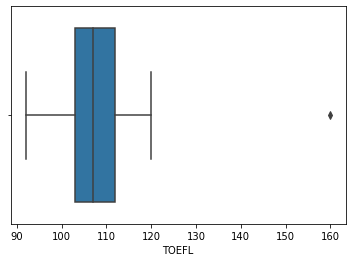

In [49]:
# Buscamos visualmente valores atípicos, encontramos el valor atípico en TOEFL.
sns.boxplot(x=df['TOEFL'])

In [50]:
df['TOEFL'].quantile([0.25, 0.5, 0.75])  #q1, q2 y q3

0.25    103.0
0.50    107.0
0.75    112.0
Name: TOEFL, dtype: float64

In [51]:
# Calcular los límites para determinar los valores atípicos
q1 = 103
q3 = 112
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Encontrar el número de fila del valor atípico
outliers = df[(df['TOEFL'] < lower_bound) | (df['TOEFL'] > upper_bound)]
indices_outliers = outliers.index.tolist()

# Imprimir el número de fila del valor atípico
for index in indices_outliers:
    print("Número de fila del valor atípico: ", index)

Número de fila del valor atípico:  4


In [52]:
#Podemos reemplazar el valor atípico por el valor promedio de la columna, o eliminar la fila.
#mostramos ambas formas pero optamos por eliminar la fila completa:
df.at[4, "TOEFL"] = df['TOEFL'].mean()
print(df.iloc[4])

SERIALNUMBER          5.000
GRE                 314.000
TOEFL               107.306
UNIVERSITYRATING      2.000
SOP                   2.000
LOR                   3.000
CGPA                  8.210
RESEARCH              0.000
CHANCEOFADMIT         0.650
Name: 4, dtype: float64


In [53]:
df.drop(4, inplace=True)
df.head()

,SERIALNUMBER,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH,CHANCEOFADMIT
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
5,6.0,330.0,115.0,5.0,4.5,3.0,NaN,1.0,0.90


In [54]:
#eliminamos las filas con valores nulos, recordemos que estaban en GRE y CGPA
#buscamos su ubicacion y vemos que estan en las filas 5 y 7
print(df.loc[(df['GRE'].isnull() == True), 'GRE'])
print(df.loc[(df['CGPA'].isnull() == True), 'CGPA'])

7   NaN
Name: GRE, dtype: float64
5   NaN
Name: CGPA, dtype: float64


In [55]:
#las eliminamos:
df.drop(5, inplace=True)
df.drop(7, inplace=True)
df.head(10)

,SERIALNUMBER,GRE,TOEFL,UNIVERSITYRATING,SOP,LOR,CGPA,RESEARCH,CHANCEOFADMIT
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
6,7.0,321.0,109.0,3.0,3.0,4.0,8.20,1.0,0.75
8,9.0,302.0,102.0,1.0,2.0,1.5,8.00,0.0,0.50
9,10.0,323.0,108.0,3.0,3.5,3.0,8.60,0.0,0.45
10,11.0,325.0,106.0,3.0,3.5,4.0,8.40,1.0,0.52
11,12.0,327.0,111.0,4.0,4.0,4.5,9.00,1.0,0.84
12,13.0,328.0,112.0,4.0,4.0,4.5,9.10,1.0,0.78


In [56]:
#comprobamos, ya no hay valores nulos:
df.count()

SERIALNUMBER        497
GRE                 497
TOEFL               497
UNIVERSITYRATING    497
SOP                 497
LOR                 497
CGPA                497
RESEARCH            497
CHANCEOFADMIT       497
dtype: int64

In [57]:
#con esto finalizamos la limpieza de los datos, guardamos en un archivo csv nuevo
df.to_csv("C:/Users/matia/OneDrive/Escritorio/Curso_The_Corner/jamboree/jamboree_datoslimpios_22junio.csv")